In [1]:
'''
    Development of dynamic Laplacian implementation via diffusion maps.
'''

import numpy as np
import matplotlib.pyplot as plt

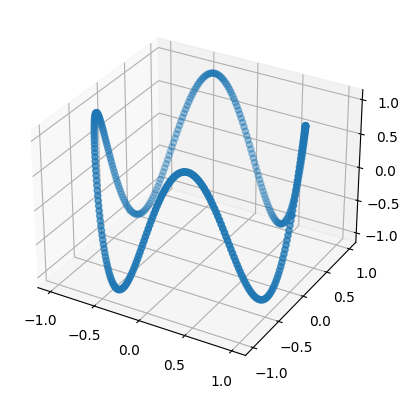

In [2]:
# Construct point set
n_t = 400
t = np.linspace(0,2*np.pi,n_t)

X = np.zeros((3,n_t)) # initialise
for i in range(n_t):
    # X[:,i] = [
    #     np.cos(3*t[i]),
    #     4*np.sin(3*np.sin(t[i])),
    #     np.sin(2*t[i])
    # ]

    X[:,i] = [
        np.cos(t[i]),
        np.sin(t[i]),
        np.sin(4*t[i])
    ]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:])

n = X.shape[1]

Plot Kernel Matrix


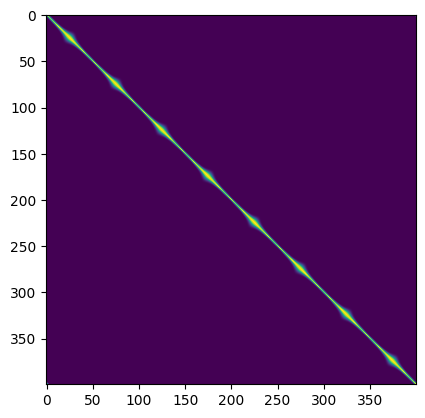

In [3]:
# Construct Laplacian

alpha = 1
epsilon = 0.01/np.sqrt(2)

def iso_kernel(x1, x2, epsilon):
    # x1, x2: numpy arrays
    # epsilon: float
    d2 = np.dot((x2-x1),(x2-x1))
    return np.exp(-d2/epsilon)

# x0 = np.array([0,1,2])
# print(iso_kernel(x0,x0+1,0.1))

ker_matrix = np.zeros((n, n), dtype=float)
for i in range(n):
    for j in range(n):
        ker_matrix[i,j] = iso_kernel(X[:,i], X[:,j], epsilon)

print('Plot Kernel Matrix')
fig = plt.figure()
plt.imshow(ker_matrix)

[0.32557189 0.34741479 0.39431191 0.41844782 0.41988318 0.41352849
 0.40463009 0.39408793 0.38200945 0.36842948 0.35337559 0.33686515
 0.31889255 0.29940711 0.27830394 0.25552401 0.23138198 0.2070304
 0.18457172 0.16619547 0.15286069 0.14404814 0.13858739 0.135404
 0.13377449 0.1333129  0.13390925 0.13570563 0.13912652 0.14494132
 0.15425922 0.16822016 0.18719329 0.21002051 0.23444501 0.25845868
 0.28103408 0.30192876 0.32122024 0.33900847 0.35533718 0.37020808
 0.38360201 0.39549079 0.40584332 0.41462906 0.4218201  0.42739248
 0.43132705 0.43361002 0.4342333  0.43319466 0.4304978  0.42615227
 0.42017323 0.4125811  0.40340091 0.39266139 0.38039345 0.36662786
 0.35139126 0.33469904 0.3165413  0.29686017 0.27554715 0.25256694
 0.22831425 0.20406963 0.18201576 0.16425167 0.1515336  0.1432071
 0.13808334 0.13512621 0.13365762 0.13332911 0.13406241 0.13603219
 0.13970258 0.14588909 0.15573126 0.17032537 0.1898767  0.21303508
 0.23750018 0.26136983 0.28373759 0.30442538 0.32352454 0.34112905

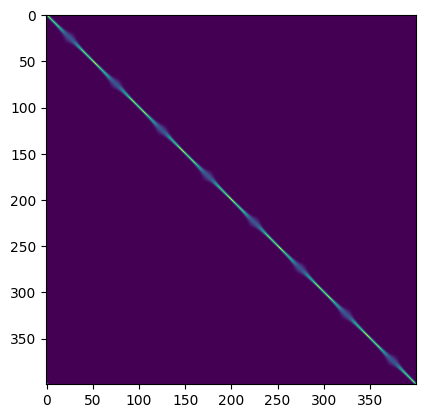

In [8]:
# Normalise matrix
q_bar = np.sum(ker_matrix, axis=1)

# print(q_bar)

d_bar = np.zeros((n,n), dtype=float)
for i in range(n):
    for j in range(n):
        d_bar[i,j] = ker_matrix[i,j]/(q_bar[i]**alpha * q_bar[j]**alpha)
d_bar = np.sum(d_bar, axis=1)

print(d_bar)

p_bar = np.zeros((n, n), dtype=float)
for i in range(n):
    for j in range(n):
        p_bar[i,j] = ker_matrix[i,j]/(d_bar[i]*q_bar[i]**alpha*q_bar[j]**alpha)

P = p_bar

print(np.max(np.sum(P, axis=1)))

fig = plt.figure()
plt.imshow(P)

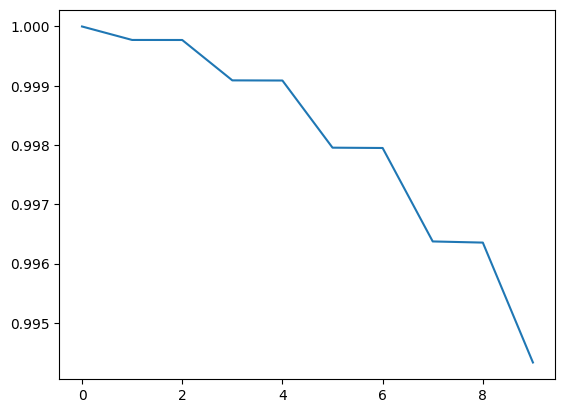

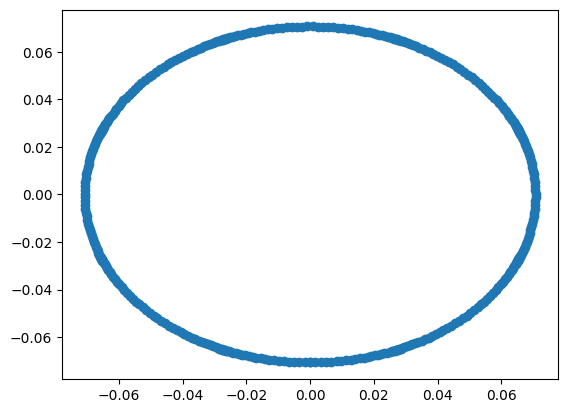

In [5]:
# Analyse eigen-vectors/-values

e, v = np.linalg.eig(P)
v = np.real(v)
e = np.real(e)
idx = e.argsort()[::-1]
e = e[idx]
v = v[:,idx]

fig = plt.figure()
plt.plot(e[:10])


fig = plt.figure()
plt.scatter(v[:,1], v[:,2])

# print(v[:,1])